Consider the data present in the Insurance dataset file.
Following is the attribute related information:


age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking, yes or no

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance


Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

Create a dataframe named "data" from the given datafile and print it's head

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import SGDRegressor

from itertools import zip_longest
data = pd.read_csv("C:/Users/choub/Downloads/datasets_insurance.csv")

data= pd.DataFrame(data)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,64,male,24.70,1,no,northwest,30166.61817
1,64,female,31.30,2,yes,southwest,47291.05500
2,64,female,39.33,0,no,northeast,14901.51670
3,64,female,33.80,1,yes,southwest,47928.03000
4,64,male,34.50,0,no,southwest,13822.80300


Understand the problem statement and the data, try understanding importance of each variable given.
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [2]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [3]:
print(data.shape)

(1338, 7)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
print(data['sex'].value_counts())
print("---------------------------")
print(data['smoker'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
---------------------------
smoker
no     1064
yes     274
Name: count, dtype: int64


Check if there are missing values. If yes, handle them.

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Check for Assumption 2-Assumption of Linearity
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

C:\Users\choub\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


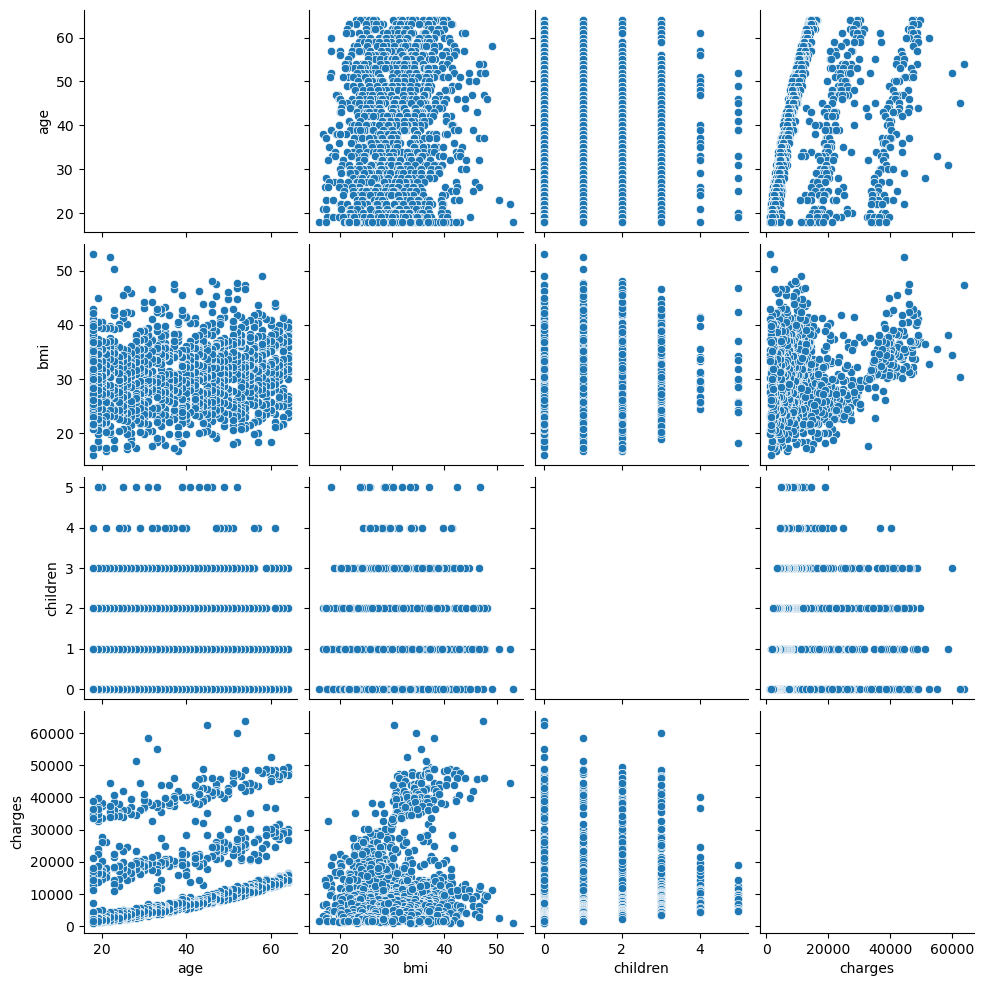

In [8]:
sns.pairplot(data,diag_kind='scatter')
plt.show()

Create X and Y

In [9]:
x = data.drop(columns = 'charges')
y = data['charges']

In [10]:
x

,age,sex,bmi,children,smoker,region
0,64,male,24.700,1,no,northwest
1,64,female,31.300,2,yes,southwest
2,64,female,39.330,0,no,northeast
3,64,female,33.800,1,yes,southwest
4,64,male,34.500,0,no,southwest
...,...,...,...,...,...,...
1333,18,male,26.125,0,no,northeast
1334,18,male,28.310,1,no,northeast
1335,18,male,53.130,0,no,southeast
1336,18,female,31.920,0,no,northeast


In [11]:
y

0       30166.61817
1       47291.05500
2       14901.51670
3       47928.03000
4       13822.80300
           ...     
1333     1708.92575
1334    11272.33139
1335     1163.46270
1336     2205.98080
1337     1629.83350
Name: charges, Length: 1338, dtype: float64

Check for Assumption 3-Assumption of Normality

Hint: You will find the data is highly positively skewed. So log transform the data.

<Axes: xlabel='charges', ylabel='Count'>

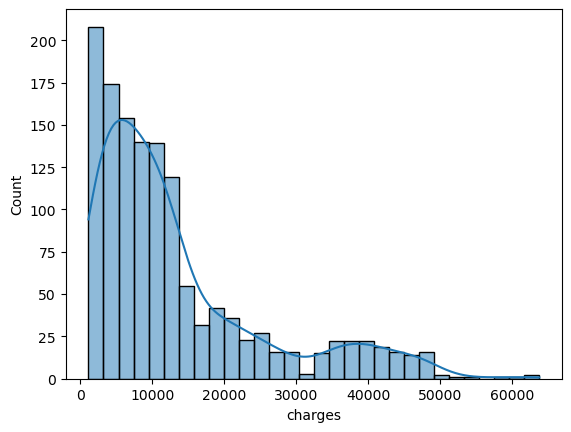

In [12]:
sns.histplot(data = y, kde = True)

<Axes: xlabel='charges', ylabel='Count'>

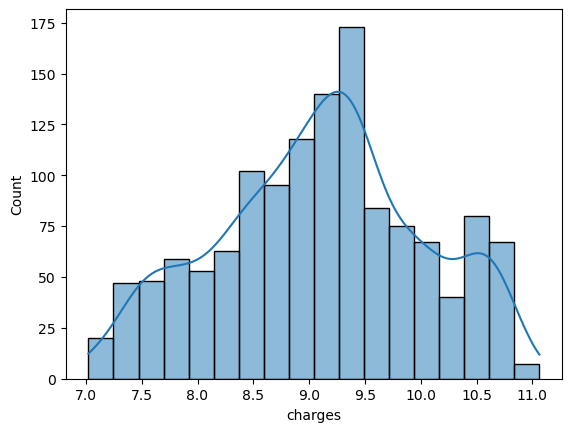

In [13]:
transformed_y = np.log(y)
sns.histplot(data = transformed_y, kde = True)

Convert Categorical variables to numerical- Sex, Smoker and Region

Hint: Make use of replace function.

Sex: Female-0,Male-1

Smoker: No-0, Yes-1

Region: northeast-0,northwest-1,southeast-2,southwest-3

In [14]:

x['sex'].replace(['female', 'male'], [0, 1], inplace = True)
x['smoker'].replace(['no', 'yes'], [0, 1], inplace = True)
x['region'].replace(['northeast', 'northwest', 'southeast', 'southwest'], [0, 1, 2, 3], inplace = True)
x.head()

,age,sex,bmi,children,smoker,region
0,64,1,24.70,1,0,1
1,64,0,31.30,2,1,3
2,64,0,39.33,0,0,0
3,64,0,33.80,1,1,3
4,64,1,34.50,0,0,3


Check for the normality in the X variables.
Hint: Some variables make not look normal but realize that they are actually discrete valued. No transformation required.

In [15]:
#for i in x.columns:
#  stat, p_value = shapiro(x[i])
#  print(f'Stat: {stat}, P_Value: {p_value}')
stat, p_value = shapiro(x)
print(f'Stat: {stat:.3f}, P_Value: {p_value:.3f}')

Stat: 0.718, P_Value: 0.000


C:\Users\choub\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Check for Assumption 4-No multicollinearity in the data
Try both the approaches-correlation and VIF.
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

In [53]:
corr = x.corr()
corr

,age,sex,bmi,children,smoker,region
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.000935
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.006952
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.186092
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.011128
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.007807
region,0.000935,0.006952,0.186092,0.011128,0.007807,1.000000


In [57]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,VIF
0,7.545876
1,2.000886
2,10.379861
3,1.800341
4,1.256997
5,2.764174


<AxesSubplot:>

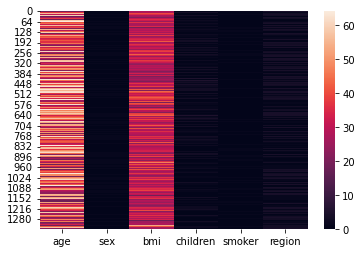

In [58]:
sns.heatmap(data = x,)

Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(x, transformed_y, test_size = None, random_state = 0)

In [60]:
print(f'x: {x.shape}, y:{transformed_y.shape}')

x: (1338, 6), y:(1338,)


In [61]:
print(f'X_train: {X_train.shape}, Y_train:{Y_train.shape}')

X_train: (1003, 6), Y_train:(1003,)


In [62]:
print(f'X_test: {X_test.shape}, Y_test:{Y_test.shape}')


X_test: (335, 6), Y_test:(335,)


In [63]:
X_test_1D = np.arange(0,len(X_test),1)
X_test_1D.shape

(335,)

Build a base Linear Regression model using sklearn.

In [65]:
lr = LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression()

In [66]:
lr.score(X_test, Y_test)

0.7868779196641977

In [67]:
print(f'Slope (A): {lr.coef_},\nIntercept (B): {lr.intercept_}')

Slope (A): [ 0.03474957 -0.04703265  0.0138207   0.09892556  1.56144891 -0.03529911],
Intercept (B): 6.984381298510732


LinearRegression()

Create a zipped list of the slope coefficients to understand the equation better.
Write down the equation manually and try making sense out of it.

In [68]:
zipped = list(zip_longest(lr.coef_, [lr.intercept_], fillvalue = lr.intercept_))

In [69]:
print('LR Equations: ')
for i in range(len(zipped)):
    print(f'y = ({zipped[i][0]:.3f})x + {zipped[i][1]:.3f}')
    

LR Equations: 
y = (0.035)x + 6.984
y = (-0.047)x + 6.984
y = (0.014)x + 6.984
y = (0.099)x + 6.984
y = (1.561)x + 6.984
y = (-0.035)x + 6.984


Predict using the model.

In [70]:
y_predict = lr.predict(X_test)

In [71]:
y_predict.shape

(335,)

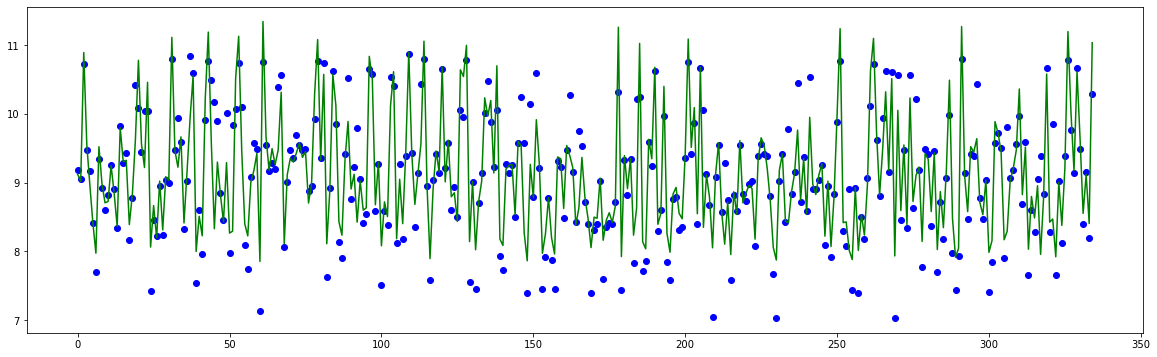

In [72]:
plt.figure(figsize = (20, 6))
plt.scatter(X_test_1D, Y_test, color ='b')
plt.plot(X_test_1D, y_predict, color ='g')
plt.show()

<AxesSubplot:ylabel='charges'>

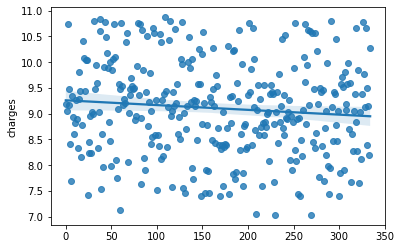

In [73]:
sns.regplot(x = X_test_1D, y = Y_test)

<AxesSubplot:>

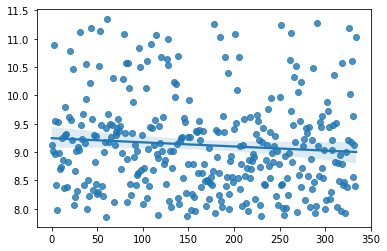

In [74]:
sns.regplot(x = X_test_1D, y = y_predict)

Evaluate the model.

In [78]:
lr.score(X_test, Y_test).round(3)

0.787

Perform Ridge and Lasso regression. Evaluate them as well.

Hint:Look at the fun in the Lasso Regression, ignore such model.

In [92]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train_scaled, Y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, Y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)

print("Ridge Regression:")
print("Mean Squared Error:", mean_squared_error(Y_test, ridge_predictions))
print("R-squared:", r2_score(Y_test, ridge_predictions))

print("\nLasso Regression:")
print("Mean Squared Error:", mean_squared_error(Y_test, lasso_predictions))
print("R-squared:", r2_score(Y_test, lasso_predictions))

Ridge Regression:
Mean Squared Error: 0.18005822444827063
R-squared: 0.7869097486379292

Lasso Regression:
Mean Squared Error: 0.8450078067610185
R-squared: -2.6110983607718907e-05


Scale the data using Standard Scaler to prepare it for SGD.

In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Split the data into train and test.

Hint: Make sure you are considering the log transformed Y.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Build the SGDRegressor.

In [100]:
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train_scaled, y_train)

SGDRegressor(random_state=42)

Predict using the model. Evaluate the model. Perform trial and error to reach the optimum model.

In [113]:
sgd_predictions = sgd_model.predict(X_test_scaled)
print("SGDRegressor:")
print("Mean Squared Error:", mean_squared_error(y_test, sgd_predictions))
print("R-squared:", r2_score(y_test, sgd_predictions))

SGDRegressor:
Mean Squared Error: 33584625.43521188
R-squared: 0.7836721426803317


Write down your conclusion as to which is the final model that you would go with along with the reasons.

SGDRegressor:
Mean Squared Error: 33584625.43521188
R-squared: 0.7836721426803317


Once finalized the model, try predicting the following observations for me.
Create the dataframe named "X_test_sample" using the given dictionary object.

sample_data={"age":[56,51,31,64,44,43,56], "sex":[1,0,1,1,0,1,1], "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725], "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}

In [103]:
import pandas as pd

# Given dictionary object
sample_data = {
    "age": [56, 51, 31, 64, 44, 43, 56],
    "sex": [1, 0, 1, 1, 0, 1, 1],
    "bmi": [19.95, 18.05, 34.39, 25.6, 23.98, 32.6, 33.725],
    "children": [0, 0, 3, 2, 2, 2, 0],
    "smoker": [1, 0, 1, 0, 0, 0, 0],
    "region": [0, 1, 1, 3, 2, 3, 1]
}


X_test_sample = pd.DataFrame(sample_data)

X_test_sample_scaled = scaler.transform(X_test_sample)


predicted_charges = sgd_model.predict(X_test_sample_scaled)


X_test_sample['predicted_charges'] = predicted_charges


print("X_test_sample with Predicted Charges:")
print(X_test_sample)


X_test_sample with Predicted Charges:
   age  sex     bmi  children  smoker  region  predicted_charges
0   56    1  19.950         0       1       0       32866.187658
1   51    0  18.050         0       0       1        7004.735149
2   31    1  34.390         3       1       1       32249.737835
3   64    1  25.600         2       0       3       13294.372113
4   44    0  23.980         2       0       2        7779.234978
5   43    1  32.600         2       0       3       10229.997608
6   56    1  33.725         0       0       1       13572.170253


The predicted values would be log transformed.Convert them back to original values.
Hint: Use np.exp()

In [106]:
predicted_charges_original_scale = np.exp(predicted_charges)

X_test_sample['predicted_charges'] = predicted_charges_original_scale

print(X_test_sample)


   age  sex     bmi  children  smoker  region  predicted_charges
0   56    1  19.950         0       1       0                inf
1   51    0  18.050         0       0       1                inf
2   31    1  34.390         3       1       1                inf
3   64    1  25.600         2       0       3                inf
4   44    0  23.980         2       0       2                inf
5   43    1  32.600         2       0       3                inf
6   56    1  33.725         0       0       1                inf


/var/folders/y7/x828cmls6wn_rgpw52tqbb3h0000gn/T/ipykernel_42186/1418868054.py:1: RuntimeWarning: overflow encountered in exp
  predicted_charges_original_scale = np.exp(predicted_charges)


Save the predicted values along with the observations into an excel file.

In [110]:
X_test_sample.to_excel("Banking.xlsx", index=False)